<a href="https://colab.research.google.com/github/Ayushraj6202/AspireNex/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

Importing and viewing data

In [5]:
data = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.shape

(7043, 21)

Cheking all Null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**:) glad to see there s no null**

**Let's see all column name of data**

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Drop customerID as it is not of that use

In [11]:
data = data.drop("customerID",axis=1)

As model requires only numeric values to train so we need to convert all dtypes from object to **numeric** values



**Cleaning and manipulation of data**

In [12]:
data = data[(data['TotalCharges']!=' ')]

In [13]:
data ['TotalCharges'] = data ['TotalCharges'].astype(float)

<ipython-input-13-b60a9909dcc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ['TotalCharges'] = data ['TotalCharges'].astype(float)


In [14]:
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
data['Churn'] = data['Churn'].replace({"No":0,"Yes":1})

In [16]:
columns_2 = ['Partner','Dependents','PhoneService','PaperlessBilling'] # No Yes
columns_3 = [ 'OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineBackup' ] # No Yes and No

In [17]:
for i in columns_2:
    print(data[i].value_counts())
    print()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64



In [18]:
for i in columns_3:
    print(data[i].value_counts())
    print()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64



These coumns values are Yes and No, i am replacing each Yes with 1 and No with 0

In [19]:
for i in columns_2:
    data [i] = data[i].replace({"No":0,"Yes":1})

In [20]:
for i in columns_3:
    data [i] = data[i].replace({"No":0,"Yes":1,"No internet service":0})

In [21]:
data['gender'] = data['gender'].replace({'Female':0,'Male':1})

In [22]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [23]:
data['MultipleLines'] = data['MultipleLines'].replace({"No":0,"No phone service":0,"Yes":1})

In [24]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [25]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [26]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [27]:
data = pd.get_dummies(data , columns = ['PaymentMethod','Contract','InternetService'],drop_first = False)

In [28]:
data.shape

(7032, 27)

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,False,False,True,False,True,False,False,True,False,False
1,1,0,0,0,34,1,0,1,0,1,...,False,False,False,True,False,True,False,True,False,False
2,1,0,0,0,2,1,0,1,1,0,...,False,False,False,True,True,False,False,True,False,False
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,False,True,False,True,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False


In [30]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)       bool
PaymentMethod_Credit card (automatic)         bool
PaymentMethod_Electronic check 

Now our all data manipulation is done

In [31]:
X = data.drop('Churn',axis=1)
Y = data['Churn']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X[:1]

array([[-1.00943013, -0.44032709,  1.03561683, -0.65230493, -1.28024804,
        -3.05633383, -0.85433559, -0.63374636,  1.37833008, -0.72391796,
        -0.63926039, -0.79018582, -0.79684918,  0.82893915, -1.16169394,
        -0.99419409, -0.52997577, -0.5253508 ,  1.40476387, -0.54360352,
         0.9026127 , -0.51453688, -0.56136439,  1.38224311, -0.88689648,
        -0.52513044]])

In [34]:
Y[:10]

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

**split data for train and test**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

#Importing all models

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
model_dict = {
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100),
    "LogisticRegression" : LogisticRegression(),
    "GradientBoost":GradientBoostingClassifier()
}

In [39]:
def AccuracyAll(model_dict, x_train, y_train, x_test, y_test):
    accr ={}
    for name, model in model_dict.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        acc = accuracy_score(y_test, predictions)
        print(f"Accuracy for {name} is {acc}")
        accr[name] = acc
    return accr

In [40]:
score = AccuracyAll(model_dict,x_train,y_train,x_test,y_test)

Accuracy for RandomForestClassifier is 0.7882018479033405
Accuracy for LogisticRegression is 0.8073916133617626
Accuracy for GradientBoost is 0.8031272210376688


# **lets change `n_estimators` value to attain maximum accuracy for RandomForestClassifier**

In [41]:
lst = [5,10,20,25,40,50,75,80,85,90,100,120,130,150]
mx_res=0
ind = 0
for i in lst:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    y_p = model.predict(x_test)
    acc = accuracy_score(y_test,y_p)
    if(acc>mx_res):
        mx_res=acc
        ind =i

print("Accuracy at ",ind," is ",np.round(mx_res*100,decimals=2)," %")

Accuracy at  25  is  79.53  %


In [42]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score

In [43]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_p = model.predict(x_test)
accuracy_score(y_test,y_p)

0.7903340440653873

In [44]:
model_df = pd.DataFrame(score,index=['Accuracy'])

In [45]:
model_df.T

,Accuracy
RandomForestClassifier,0.788202
LogisticRegression,0.807392
GradientBoost,0.803127


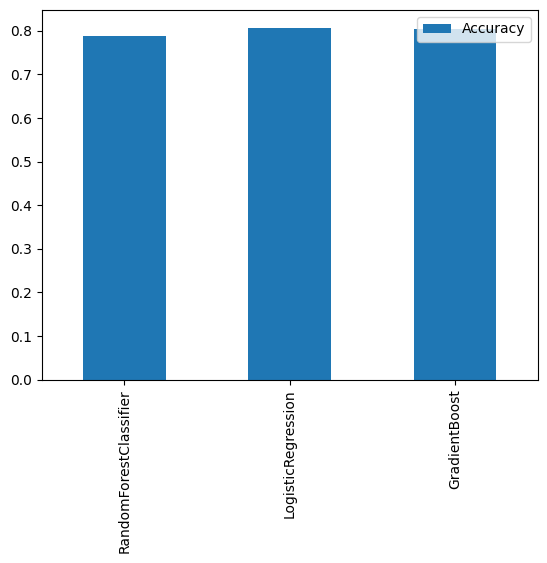

In [46]:
plt = model_df.T.plot.bar()

All most all three model is performing same with accuracy about 80%

Text(20.72222222222222, 0.5, 'Predicted Value')

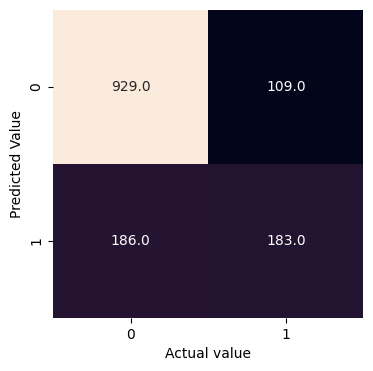

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix(y_test,y_p),annot=True,cbar=False,fmt=".1f")
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")

In [48]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.63      0.50      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

